# Scikit-Learn?
* Schikit-learn: 머신러닝을 위한 파이썬 패키지
* various examples: https://scikit-learn.org/stable/ (official page)

* 사이킷런은 일반적인 파이썬이 아닌 C와 C++그리고 파이썬용 C엔진인 Cython으로 개발됨
* → 동일한 알고리즘을 파이썬으로 작성 시 사이킷런보다 느리게 실행

## Install scikit-learn

In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Toy Dataset
* sklearn(사이킷런)은 다양한 토이 데이터셋을 제공함
* references: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

In [ ]:
# Example 꽃봉우리 데이터셋 로드하기
from sklearn.datasets import load_iris
iris = load_iris()

data = iris["data"] # 실제 데이터 (모델 인풋, X)
target = iris["target"] # 예측 값 (실제 아웃풋, Y)
feature_name = iris["feature_names"] # 각 열이 무슨 데이터인지

## Model Selection

### Train-Test Split
- 데이터를 훈련용과 테스트용으로 분리해주는 함수
- sklearn에 model_selection 패키지 안에 존재



- test_size: 테스트셋의 크기(비율)를 설정하는 파라미터 (0~1)
- random_state: [파라미터 미사용시] → 랜덤하게 자름 / [int 값] → 숫자가 같다면 동일하게 데이터를 분할

In [ ]:
# Load dataset
from sklearn.datasets import load_iris
iris = load_iris()

data = iris["data"] # 실제 데이터 (모델 인풋, X)
target = iris["target"] # 예측 값 (실제 아웃풋, Y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=1213)

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


### 5Fold Cross Validation (cross_val_score)
* cross_val_score 함수를 통해 5폴드 검증을 수행
* 함수안에 classifier과 훈련용 데이터를 넣고, 몇 폴드를 나눌 것인지 설정해주면 자동으로 분할하여 계산


In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB() #gaussian naive bayes
scores = cross_val_score(clf, data, target, cv=5)

In [72]:
# 결과 리포팅
for idx, score in enumerate(scores):
    print(f"{idx+1}Fold Accuracy: {score:.2f}")

1Fold Accuracy: 0.93
2Fold Accuracy: 0.97
3Fold Accuracy: 0.93
4Fold Accuracy: 0.93
5Fold Accuracy: 1.00


# Clustering

## Load Dataset
* kmeans 학습을 위하여 이전 실습에서 활용한 iris 데이터셋 로드
* Unsupervised Learning → target데이터는 사용 x

In [ ]:
# Load dataset
from sklearn.datasets import load_iris
iris = load_iris()

data = iris["data"] # 실제 데이터
feature_name = iris["feature_names"]

## Model Training
* Load KMeans Model from sklearn
* Training model by fit
* Make prediction after training

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
predict = kmeans.fit_predict(data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Clustering 시각화
* K-means의 시각화를 위해 matplotlib 활용
* 2차원에 표현하기 위하여 3, 4번째 feature만을 활용하여 시각화 진행

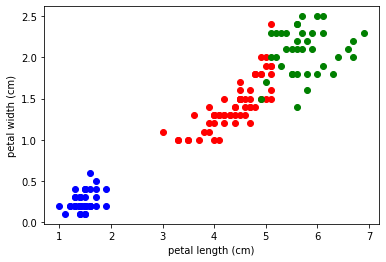

In [ ]:
import matplotlib.pyplot as plt

data_with_label_0 = data[predict==0]
plt.scatter(data_with_label_0[:, 2], data_with_label_0[:, 3], color="red")

data_with_label_1 = data[predict==1]
plt.scatter(data_with_label_1[:, 2], data_with_label_1[:, 3], color="blue")

data_with_label_2 = data[predict==2]
plt.scatter(data_with_label_2[:, 2], data_with_label_2[:, 3], color="green")

plt.xlabel(feature_name[2])
plt.ylabel(feature_name[3])
plt.show()


In [ ]:
kmeans.cluster_centers_[:, 2:]

array([[4.39354839, 1.43387097],
       [1.462     , 0.246     ],
       [5.74210526, 2.07105263]])

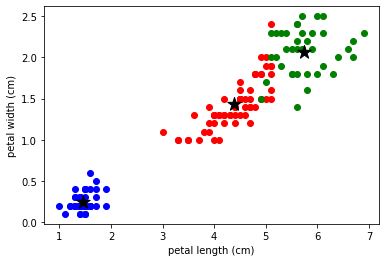

In [ ]:
import matplotlib.pyplot as plt

data_with_label_0 = data[predict==0]
plt.scatter(data_with_label_0[:, 2], data_with_label_0[:, 3], color="red")

data_with_label_1 = data[predict==1]
plt.scatter(data_with_label_1[:, 2], data_with_label_1[:, 3], color="blue")

data_with_label_2 = data[predict==2]
plt.scatter(data_with_label_2[:, 2], data_with_label_2[:, 3], color="green")


plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=200, marker='*', color="black")

plt.xlabel(feature_name[2])
plt.ylabel(feature_name[3])
plt.show()


## KMeans from Scratch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


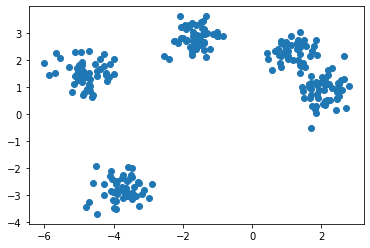

In [32]:
customers = np.loadtxt("/content/drive/MyDrive/ML_2023_1학기/customers.txt") # 데이터 불러오기
plt.scatter(customers[:, 0], customers[:, 1]) # 불러온 데이터 시각화

In [33]:
k = 5  # 클러스터의 개수 지정

In [34]:
centroids = np.random.random((k, 2)) # 임의로 클러스터 중앙값 설정

In [35]:
err = customers - centroids[:, np.newaxis, :] # 클러스터 중앙값과 데이터간의 오차 계산 (x, y 각 값에 대한 오차)
dist = np.sqrt(np.sum(err**2, axis = 2)) # 오차를 기반으로 거리 계산
assignment = np.argmin((dist), axis = 0) # 거리가 가장 가까운 클러스터로 데이터 할당

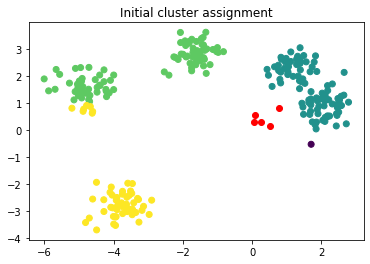

In [36]:
plt.scatter(customers[:, 0], customers[:, 1], c=assignment) # assign된 값을 기반으로 데이터 분포 시각화
plt.scatter(centroids[:, 0], centroids[:, 1], c="red")
plt.title("Initial cluster assignment");

In [37]:
for i in range(k): # k개의 클러스터에 대해 계산
    if len(customers[assignment==i]) == 0: # 만약 해당 클러스터에 데이터가 없다면 무시
        continue
    centroids[i] = np.mean(customers[assignment==i], axis = 0) # 새로 assign한 데이터들의 평균점으로 클러스터 중심값 업데이트

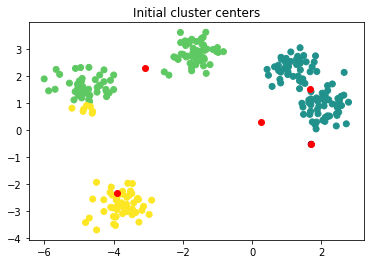

In [38]:
plt.scatter(customers[:, 0], customers[:, 1], c=assignment) # assign한 값과 중심점 시각화
plt.scatter(centroids[:, 0], centroids[:, 1], c="red")
plt.title("Initial cluster centers");

In [39]:
for _ in range(100): # 위의 업데이트 과정을 100번 반복
    # 중심점 업데이트
    for i in range(k):
        if len(customers[assignment==i]) == 0:
            continue
        centroids[i] = np.mean(customers[assignment==i], axis = 0)
    
    # 새로운 클러스터 중심점을 기반으로 데이터를 가장 가까운 클러스터로 재할당
    err = customers - centroids[:, np.newaxis, :]
    dist = np.sqrt(np.sum(err**2, axis = 2))
    assignment = np.argmin((dist), axis = 0)

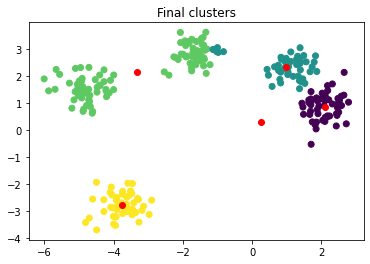

In [40]:
# 최종 클러스터 시각화
plt.scatter(customers[:, 0], customers[:, 1], c=assignment)
plt.scatter(centroids[:, 0], centroids[:, 1], c="red")
plt.title("Final clusters");

# 실습과제

* scikit-learn dataset에서 iris dataset를 불러온 뒤,
* iris dataset으로 KMeans(구현된 모델을 불러와 사용해도 되고, 스크래치로 구현하여 사용해도 됨)알고리즘을 활용하여 서로 다른 K 값으로 학습시키고,
* 그에 대한 결과를 시각화해보세요. (실습 내용을 그대로 활용해도 됩니다)

In [85]:
# Your Code Here
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

iris = load_iris()
data = iris["data"]
features = iris["feature_names"]

In [105]:
kmeans_2 = KMeans(n_clusters = 2)
predict_2 = kmeans_2.fit_predict(data)

kmeans_3= KMeans(n_clusters = 3)
predict_3 = kmeans_3.fit_predict(data)

kmeans_4 = KMeans(n_clusters = 4)
predict_4 = kmeans_4.fit_predict(data)

kmeans_5 = KMeans(n_clusters = 5)
predict_5 = kmeans_5.fit_predict(data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


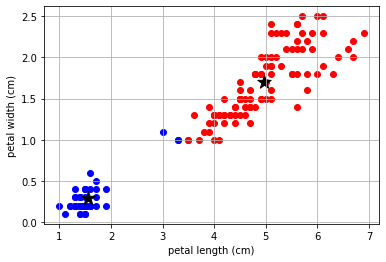

In [106]:
data_with_label_0 = data[predict_2==0]
plt.scatter(data_with_label_0[:, 2], data_with_label_0[:, 3], color="red")

data_with_label_1 = data[predict_2==1]
plt.scatter(data_with_label_1[:, 2], data_with_label_1[:, 3], color="blue")

plt.scatter(kmeans_2.cluster_centers_[:, 2], kmeans_2.cluster_centers_[:, 3], s=200, marker='*', color="black")
plt.xlabel(feature_name[2])
plt.ylabel(feature_name[3])
plt.grid()
plt.show()

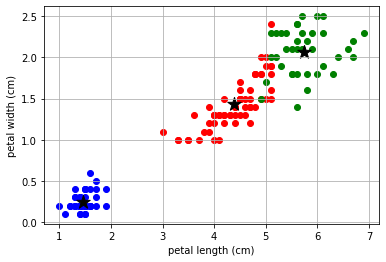

In [102]:
data_with_label_0 = data[predict_3==0]
plt.scatter(data_with_label_0[:, 2], data_with_label_0[:, 3], color="red")

data_with_label_1 = data[predict_3==1]
plt.scatter(data_with_label_1[:, 2], data_with_label_1[:, 3], color="blue")

data_with_label_2 = data[predict_3==2]
plt.scatter(data_with_label_2[:, 2], data_with_label_2[:, 3], color="green")


plt.scatter(kmeans_3.cluster_centers_[:, 2], kmeans_3.cluster_centers_[:, 3], s=200, marker='*', color="black")
plt.xlabel(feature_name[2])
plt.ylabel(feature_name[3])
plt.grid()
plt.show()

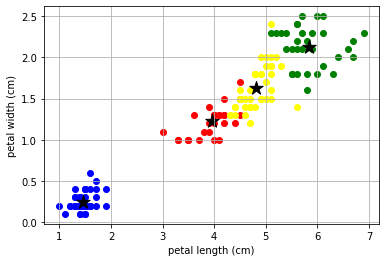

In [103]:
data_with_label_0 = data[predict_4==0]
plt.scatter(data_with_label_0[:, 2], data_with_label_0[:, 3], color="red")

data_with_label_1 = data[predict_4==1]
plt.scatter(data_with_label_1[:, 2], data_with_label_1[:, 3], color="blue")

data_with_label_2 = data[predict_4==2]
plt.scatter(data_with_label_2[:, 2], data_with_label_2[:, 3], color="green")

data_with_label_3 = data[predict_4==3]
plt.scatter(data_with_label_3[:, 2], data_with_label_3[:, 3], color="yellow")

plt.scatter(kmeans_4.cluster_centers_[:, 2], kmeans_4.cluster_centers_[:, 3], s=200, marker='*', color="black")

plt.xlabel(feature_name[2])
plt.ylabel(feature_name[3])
plt.grid()
plt.show()

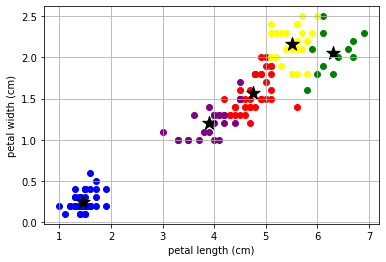

In [104]:
data_with_label_0 = data[predict_5==0]
plt.scatter(data_with_label_0[:, 2], data_with_label_0[:, 3], color="red")

data_with_label_1 = data[predict_5==1]
plt.scatter(data_with_label_1[:, 2], data_with_label_1[:, 3], color="blue")

data_with_label_2 = data[predict_5==2]
plt.scatter(data_with_label_2[:, 2], data_with_label_2[:, 3], color="green")

data_with_label_1 = data[predict_5==3]
plt.scatter(data_with_label_1[:, 2], data_with_label_1[:, 3], color="yellow")

data_with_label_2 = data[predict_5==4]
plt.scatter(data_with_label_2[:, 2], data_with_label_2[:, 3], color="purple")

plt.scatter(kmeans_5.cluster_centers_[:, 2], kmeans_5.cluster_centers_[:, 3], s=200, marker='*', color="black")


plt.xlabel(feature_name[2])
plt.ylabel(feature_name[3])
plt.grid()
plt.show()